In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml-competition-sjce/test.csv
/kaggle/input/ml-competition-sjce/data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("/kaggle/input/ml-competition-sjce/data.csv")
test=pd.read_csv("/kaggle/input/ml-competition-sjce/test.csv")

In [4]:
from sklearn.impute import SimpleImputer

In [5]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.150553,212.819377,15017.747281,5.544436,319.494952,279.447066,12.850506,75.028793,4.810537,0
1,NaN,180.680598,8692.538152,8.671793,396.528754,534.339086,10.299787,87.652015,3.913602,0
2,5.344117,198.379144,13492.840835,6.559265,328.648845,591.363369,14.084388,61.392983,4.104699,1
3,7.647872,160.774353,29000.589712,7.217409,NaN,438.800961,13.182501,67.099969,3.078673,1
4,8.129586,177.898967,27834.217696,9.006008,334.438539,397.021428,15.936262,81.390758,3.362537,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2234 non-null   float64
 1   Hardness         2620 non-null   float64
 2   Solids           2620 non-null   float64
 3   Chloramines      2620 non-null   float64
 4   Sulfate          1999 non-null   float64
 5   Conductivity     2620 non-null   float64
 6   Organic_carbon   2620 non-null   float64
 7   Trihalomethanes  2495 non-null   float64
 8   Turbidity        2620 non-null   float64
 9   Potability       2620 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 204.8 KB


In [7]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2234.000000,2620.000000,2620.000000,2620.000000,1999.000000,2620.000000,2620.000000,2495.000000,2620.000000,2620.000000
mean,7.071024,196.200911,21973.377381,7.130793,334.040923,425.749573,14.292469,66.194111,3.965649,0.394275
std,1.588089,33.137494,8702.501618,1.584109,41.573027,81.038498,3.272972,16.186110,0.783198,0.488788
min,0.000000,47.432000,728.750830,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.089577,176.734160,15715.740730,6.125502,307.992545,365.842780,12.067417,55.711220,3.441806,0.000000
50%,7.022285,196.926487,20926.882155,7.131972,333.073546,421.884968,14.220645,66.299162,3.962234,0.000000
75%,8.035837,216.657847,27216.632550,8.105680,360.601377,481.089353,16.541731,77.127254,4.497554,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,27.006707,124.000000,6.739000,1.000000


In [8]:
data.isnull().sum()

ph                 386
Hardness             0
Solids               0
Chloramines          0
Sulfate            621
Conductivity         0
Organic_carbon       0
Trihalomethanes    125
Turbidity            0
Potability           0
dtype: int64

In [9]:
imputer = SimpleImputer(strategy='mean')

In [10]:
imputer.fit(data)

SimpleImputer()

In [11]:
x=imputer.transform(data)

In [12]:
modi=pd.DataFrame(x,columns=data.columns)

In [13]:
modi.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [14]:
modi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2620 non-null   float64
 1   Hardness         2620 non-null   float64
 2   Solids           2620 non-null   float64
 3   Chloramines      2620 non-null   float64
 4   Sulfate          2620 non-null   float64
 5   Conductivity     2620 non-null   float64
 6   Organic_carbon   2620 non-null   float64
 7   Trihalomethanes  2620 non-null   float64
 8   Turbidity        2620 non-null   float64
 9   Potability       2620 non-null   float64
dtypes: float64(10)
memory usage: 204.8 KB


In [15]:
modi.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of          ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
0     False     False   False        False    False         False   
1     False     False   False        False    False         False   
2     False     False   False        False    False         False   
3     False     False   False        False    False         False   
4     False     False   False        False    False         False   
...     ...       ...     ...          ...      ...           ...   
2615  False     False   False        False    False         False   
2616  False     False   False        False    False         False   
2617  False     False   False        False    False         False   
2618  False     False   False        False    False         False   
2619  False     False   False        False    False         False   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
0              False            False      Fal

In [16]:
modi.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [17]:
modi.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.150553,212.819377,15017.747281,5.544436,319.494952,279.447066,12.850506,75.028793,4.810537,0.0
1,7.071024,180.680598,8692.538152,8.671793,396.528754,534.339086,10.299787,87.652015,3.913602,0.0
2,5.344117,198.379144,13492.840835,6.559265,328.648845,591.363369,14.084388,61.392983,4.104699,1.0
3,7.647872,160.774353,29000.589712,7.217409,334.040923,438.800961,13.182501,67.099969,3.078673,1.0
4,8.129586,177.898967,27834.217696,9.006008,334.438539,397.021428,15.936262,81.390758,3.362537,0.0


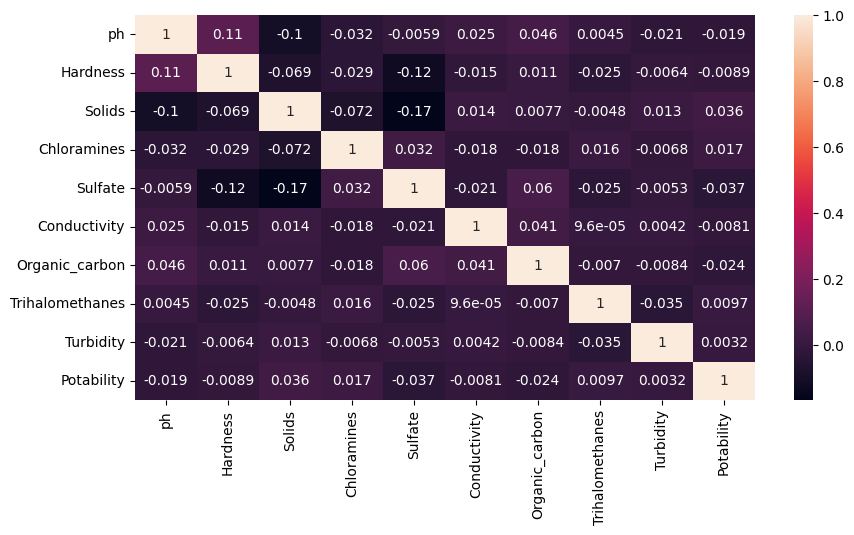

In [18]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot = True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


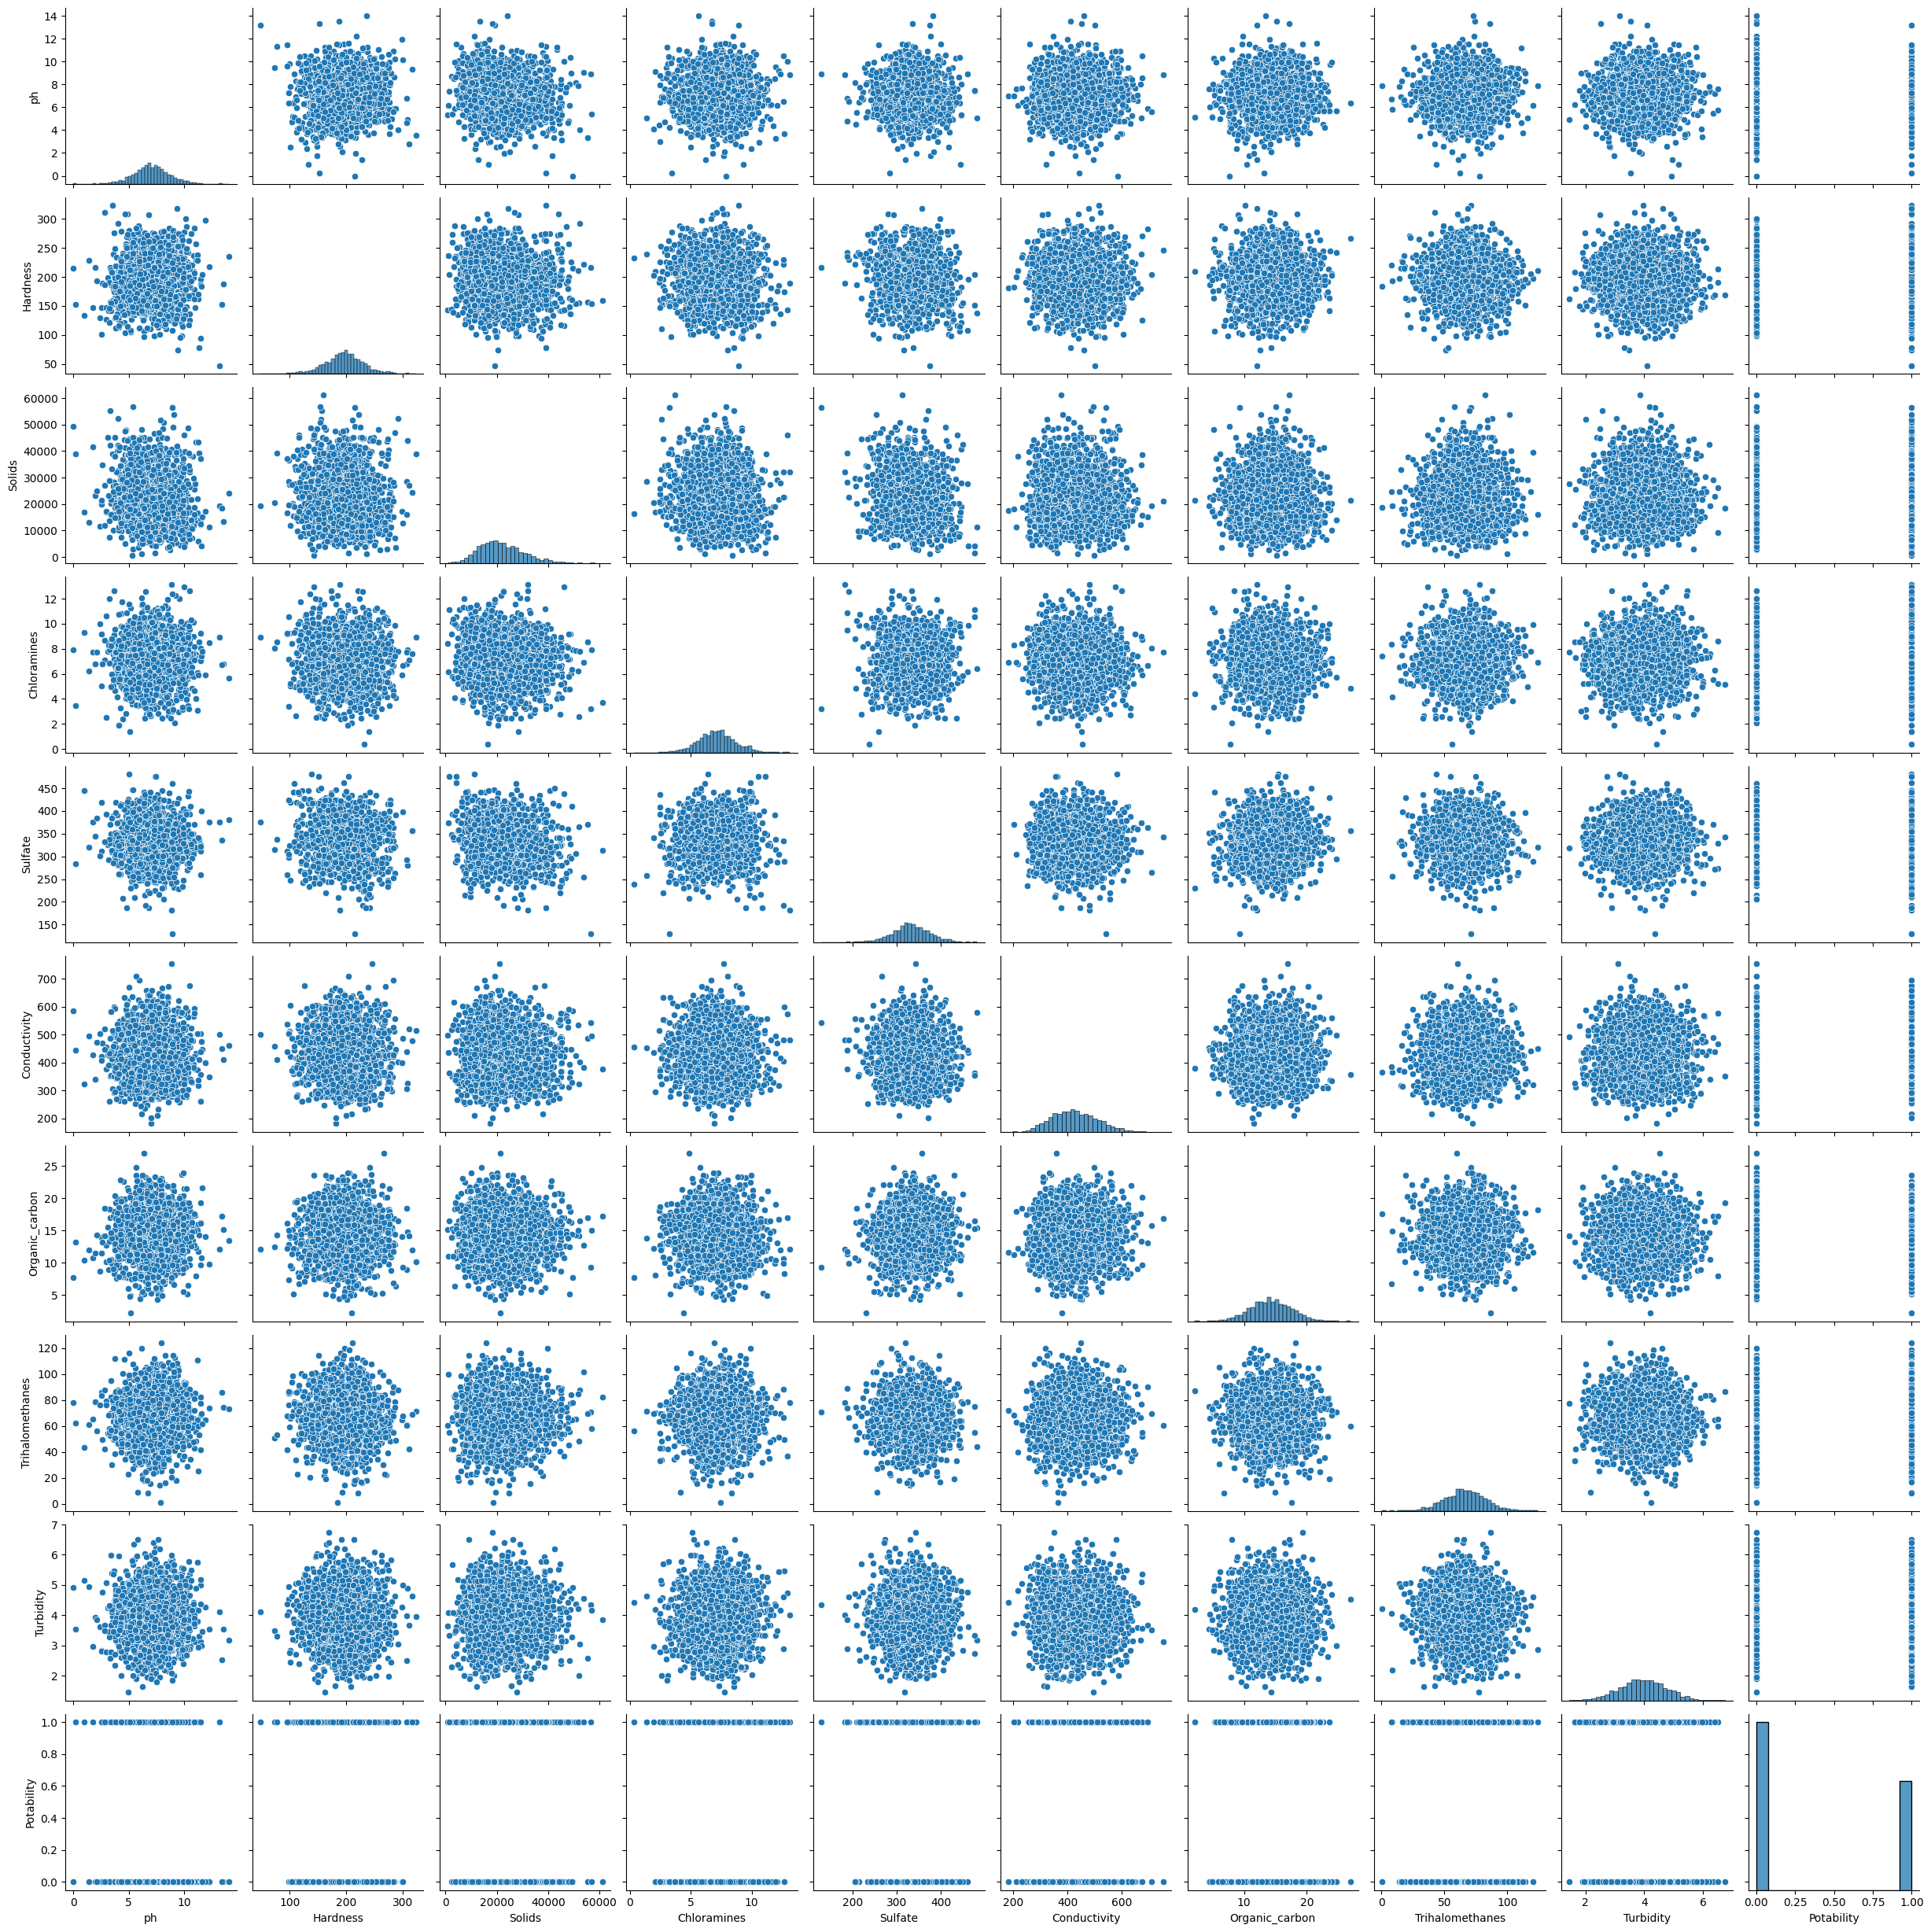

In [19]:
sns.pairplot(data)
plt.show()

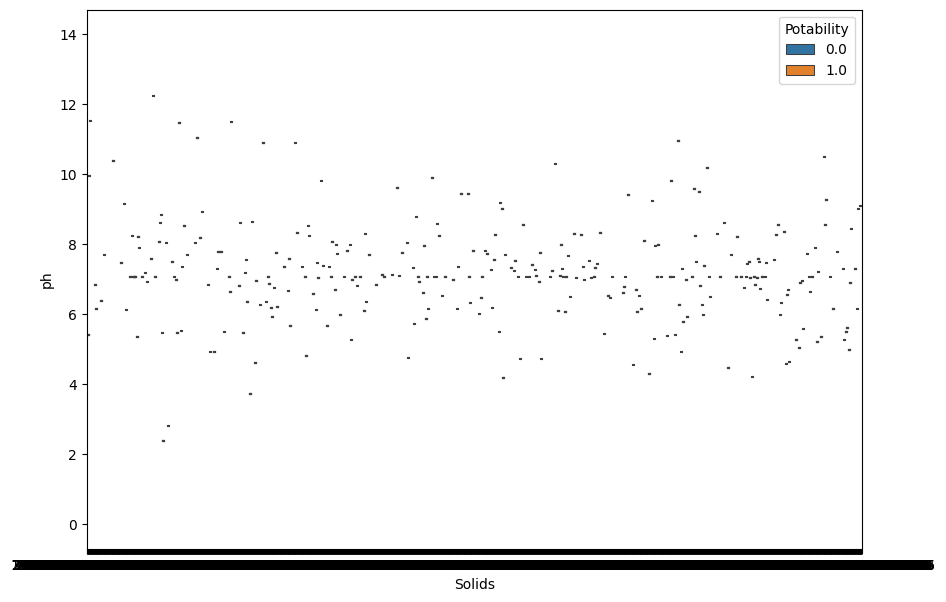

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(data=modi, y='ph', x='Solids', hue='Potability')
plt.show()

<Axes: xlabel='Potability', ylabel='Chloramines'>

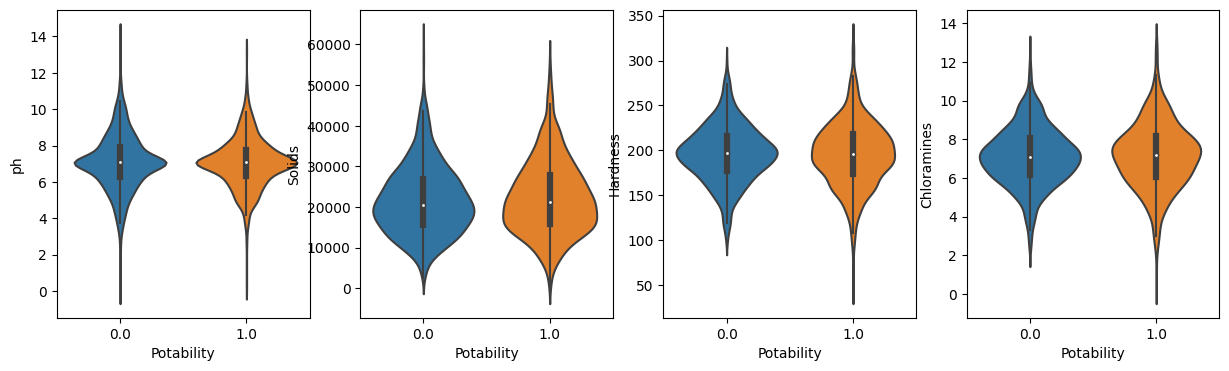

In [21]:
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
sns.violinplot(data=modi, y='ph', x='Potability')
plt.subplot(1,4,2)
sns.violinplot(data=modi, y='Solids', x='Potability')
plt.subplot(1,4,3)
sns.violinplot(data=modi, y='Hardness', x='Potability')
plt.subplot(1,4,4)
sns.violinplot(data=modi, y='Chloramines', x='Potability')

<Axes: xlabel='Potability', ylabel='Trihalomethanes'>

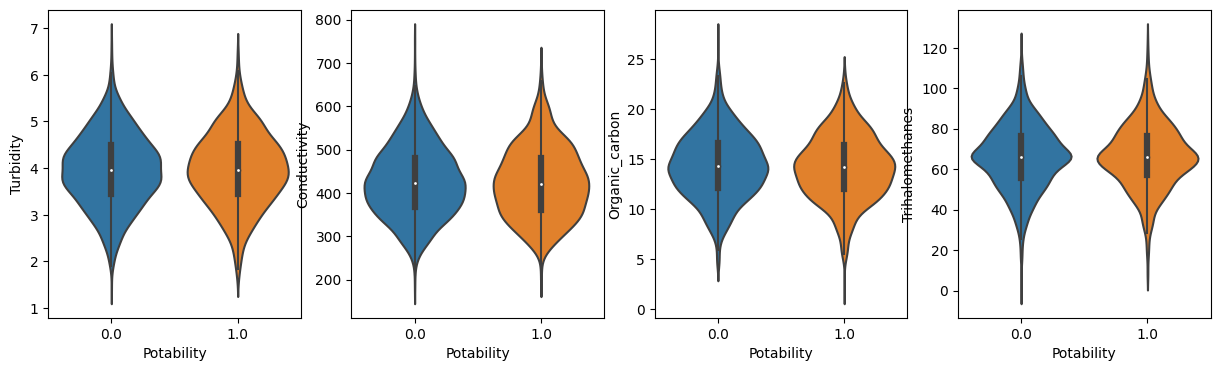

In [22]:
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
sns.violinplot(data=modi, y='Turbidity', x='Potability')
plt.subplot(1,4,2)
sns.violinplot(data=modi, y='Conductivity', x='Potability')
plt.subplot(1,4,3)
sns.violinplot(data=modi, y='Organic_carbon', x='Potability')
plt.subplot(1,4,4)
sns.violinplot(data=modi, y='Trihalomethanes', x='Potability')

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

In [24]:
X = data.drop(['Potability'],axis=1)
Y= data['Potability']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=101,shuffle=True)

In [26]:
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [27]:
decision_tree_model = DecisionTreeClassifier(max_depth=3)

In [28]:
decision_tree_model.fit(X_train_imputed, Y_train)

DecisionTreeClassifier(max_depth=3)

In [29]:
y_pred = decision_tree_model.predict(X_test_imputed)

In [30]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6450381679389313


In [31]:
import pandas as pd
from sklearn.impute import SimpleImputer


test_data = pd.read_csv('/kaggle/input/ml-competition-sjce/test.csv')


selected_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']


test_data_sliced = test_data[selected_features]


imputer = SimpleImputer(strategy='median')
imputer.fit(X_train)  


test_data_imputed = imputer.transform(test_data_sliced)

y_pred = decision_tree_model.predict(test_data_imputed)


In [32]:
import pandas as pd

id = test_data['id']
data = {
    'id': id,
    'output': y_pred 
}


df = pd.DataFrame(data)


print(df)

csv_file_path = 'water_prob.csv'


df.to_csv(csv_file_path, index=False)  

      id  output
0      1       0
1      2       0
2      3       0
3      4       0
4      5       0
..   ...     ...
651  652       0
652  653       0
653  654       0
654  655       0
655  656       0

[656 rows x 2 columns]
